<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,60.009327,0.045862,70.055189,70.019830,0.035359
1,0.0,1.0,48.879757,0.066974,58.946731,58.890293,0.056438
2,0.0,2.0,85.431484,-0.030407,95.401077,95.441913,-0.040836
3,0.0,3.0,35.551891,-0.169793,45.382097,45.562465,-0.180368
4,0.0,4.0,67.168380,0.209411,77.377792,77.178863,0.198929
...,...,...,...,...,...,...,...
29995,999.0,25.0,36.135098,0.017878,46.152976,46.109646,0.043330
29996,999.0,26.0,28.107135,0.020659,38.127794,38.073305,0.054488
29997,999.0,27.0,28.825957,-0.130510,38.695447,38.792877,-0.097431
29998,999.0,28.0,98.663027,-0.049750,108.613277,108.702828,-0.089550


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,60.009327,0.045862,70.055189,70.019830,0.035359
1,0.0,1.0,48.879757,0.066974,58.946731,58.890293,0.056438
2,0.0,2.0,85.431484,-0.030407,95.401077,95.441913,-0.040836
3,0.0,3.0,35.551891,-0.169793,45.382097,45.562465,-0.180368
4,0.0,4.0,67.168380,0.209411,77.377792,77.178863,0.198929
...,...,...,...,...,...,...,...
29995,999.0,25.0,36.135098,0.017878,46.152976,46.109646,0.043330
29996,999.0,26.0,28.107135,0.020659,38.127794,38.073305,0.054488
29997,999.0,27.0,28.825957,-0.130510,38.695447,38.792877,-0.097431
29998,999.0,28.0,98.663027,-0.049750,108.613277,108.702828,-0.089550


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,60.009327,0.045862,70.055189,70.019830,0.035359
1,0.0,1.0,48.879757,0.066974,58.946731,58.890293,0.056438
2,0.0,2.0,85.431484,-0.030407,95.401077,95.441913,-0.040836
3,0.0,3.0,35.551891,-0.169793,45.382097,45.562465,-0.180368
4,0.0,4.0,67.168380,0.209411,77.377792,77.178863,0.198929
...,...,...,...,...,...,...,...
29995,999.0,25.0,36.135098,0.017878,46.152976,46.109646,0.043330
29996,999.0,26.0,28.107135,0.020659,38.127794,38.073305,0.054488
29997,999.0,27.0,28.825957,-0.130510,38.695447,38.792877,-0.097431
29998,999.0,28.0,98.663027,-0.049750,108.613277,108.702828,-0.089550


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    60.009327  0.045862   70.055189   70.019830  0.035359
      1.0    48.879757  0.066974   58.946731   58.890293  0.056438
      2.0    85.431484 -0.030407   95.401077   95.441913 -0.040836
      3.0    35.551891 -0.169793   45.382097   45.562465 -0.180368
      4.0    67.168380  0.209411   77.377792   77.178863  0.198929
...                ...       ...         ...         ...       ...
999.0 25.0   36.135098  0.017878   46.152976   46.109646  0.043330
      26.0   28.107135  0.020659   38.127794   38.073305  0.054488
      27.0   28.825957 -0.130510   38.695447   38.792877 -0.097431
      28.0   98.663027 -0.049750  108.613277  108.702828 -0.089550
      29.0   59.751163 -0.015564   69.735599   69.750356 -0.014757

[30000 rows x 5 columns]

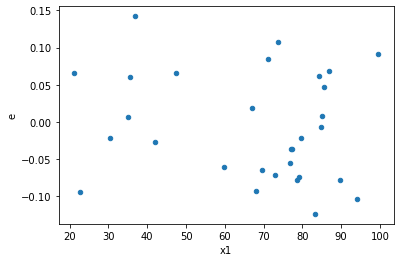

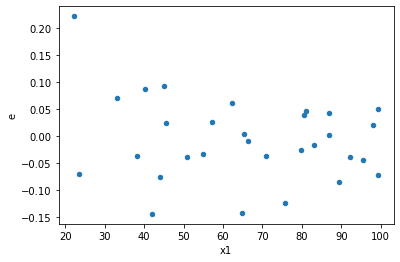

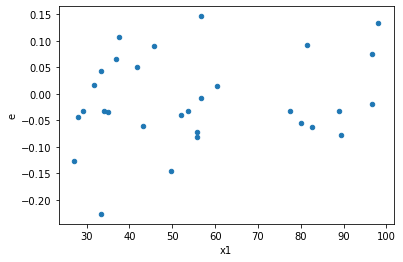

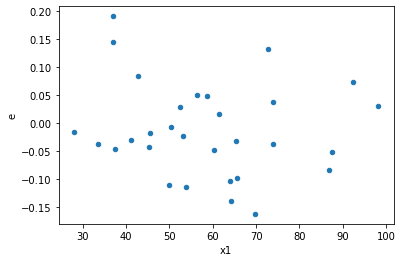

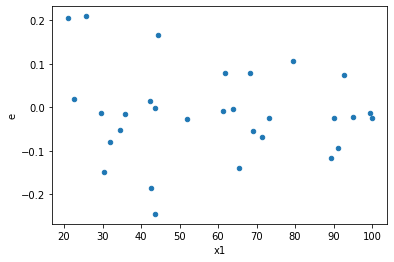

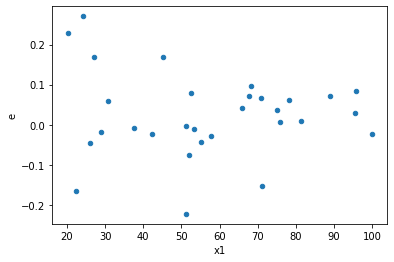

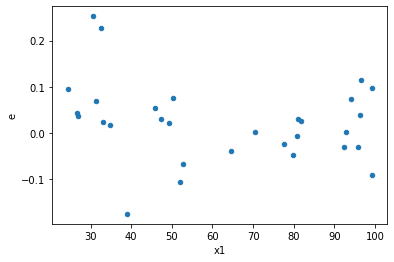

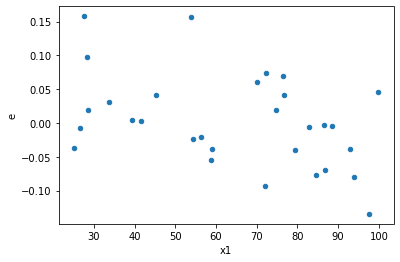

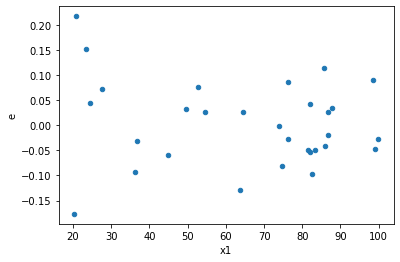

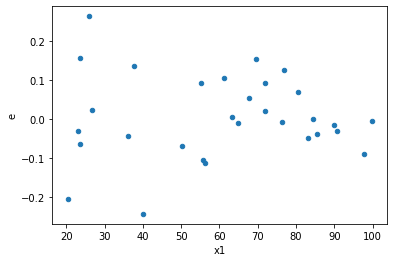

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
10.0,11.0,11.0,0.05213934627468451,0.05366020772508799,0.004739940570425864,0.004878200702280727,1.0291691699084826,0.9628250195273531,0.5185874902363234,0.48141250976367655,Reject005=1 : Homoscedasticity
34.0,11.0,11.0,0.06277579630586254,0.10688121385027434,0.005706890573260231,0.009716473986388576,1.7025863491960653,0.3910173855561023,0.8044913072219488,0.19550869277805116,Reject005=1 : Homoscedasticity
58.0,11.0,11.0,0.04444417395548156,0.056307892178448095,0.004040379450498324,0.005118899288949826,1.2669352845853332,0.7016323105542039,0.649183844722898,0.35081615527710197,Reject005=1 : Homoscedasticity
75.0,11.0,11.0,0.052750789878477186,0.057555796685785206,0.004795526352588835,0.0052323451532532,1.0910888124780194,0.887633543651166,0.556183228174417,0.443816771825583,Reject005=1 : Homoscedasticity
101.0,11.0,11.0,0.07923741651907507,0.08968485841976581,0.007203401501734097,0.008153168947251438,1.131849855278607,0.8409207260935729,0.5795396369532135,0.42046036304678647,Reject005=1 : Homoscedasticity
102.0,11.0,11.0,0.05235669655534739,0.07229546953815157,0.004759699686849763,0.006572315412559233,1.3808256497184932,0.6016721715992399,0.69916391420038,0.30083608579961996,Reject005=1 : Homoscedasticity
105.0,11.0,11.0,0.05044298827703616,0.06672753065534015,0.004585726207003287,0.006066139150485469,1.322830643753067,0.6506768030720873,0.6746615984639563,0.32533840153604365,Reject005=1 : Homoscedasticity
107.0,11.0,11.0,0.06863966828294903,0.08420464271583142,0.006239969843904457,0.007654967519621038,1.2267635439134097,0.7406154640123939,0.6296922679938031,0.37030773200619693,Reject005=1 : Homoscedasticity
118.0,11.0,11.0,0.041898500023735,0.05602696792758999,0.0038089545476122726,0.005093360720689999,1.337207009698471,0.6381701908055373,0.6809149045972314,0.31908509540276864,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.29320585421274215,0.030180092961937056,0.02665507765570383,0.0027436448147215506,0.1029314132999514,0.0007203911954850861,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,0.1213610036760981,0.0515542292805654,0.011032818516008918,0.004686748116415036,0.4248006173231652,0.17131260401344642,Reject005=1 : Homoscedasticity
2.0,11.0,11.0,0.07465956070518334,0.02343372854325235,0.006787232791380304,0.0021303389584774865,0.31387444986165625,0.06714503910903084,Reject005=1 : Homoscedasticity
3.0,11.0,11.0,0.15472067208598675,0.02012874005562308,0.014065515644180614,0.0018298854596020984,0.13009728941997123,0.002088069529467602,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,0.16934549362032245,0.07486201260500944,0.015395044874574769,0.006805637509546312,0.4420667536205732,0.1915526830843663,Reject005=1 : Homoscedasticity
5.0,11.0,11.0,0.10221663351996266,0.040247212321791306,0.009292421229087515,0.0036588374837992097,0.3937442560552645,0.1374166980715196,Reject005=1 : Homoscedasticity
6.0,11.0,11.0,0.11506648916970211,0.08471371784195783,0.010460589924518373,0.007701247076541621,0.7362153695071076,0.6202533613907217,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,0.10244068686140487,0.03459592394870531,0.00931278971467317,0.0031450839953368463,0.3377166339728978,0.08539987098374706,Reject005=1 : Homoscedasticity
8.0,11.0,11.0,0.11101276093961966,0.046105134516852955,0.01009206917632906,0.0041913758651684506,0.41531382632605407,0.16060470493080242,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      624
Reject005=0 : Heteroscedasticity    376
Name: Result_test, dtype: int64